In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['1.csv', '0.csv', '2.csv', '3.csv']


Add Datasets

In [2]:
df0 = pd.read_csv("../input/0.csv",header = None)
df1 = pd.read_csv("../input/1.csv")
df2 = pd.read_csv("../input/2.csv")
df3 = pd.read_csv("../input/3.csv")
df0.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


Change Column Names

In [3]:
col_names = list()
for i in range(0,65):
    if i == 64:
        col_names.append("class")
    else:
        col_names.append("sensor"+str(i+1))
    

In [4]:
df0.columns = col_names
df1.columns = col_names
df2.columns = col_names
df3.columns = col_names

Concatenate Data Frames

In [5]:
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(2910, 65)
(2902, 65)
(2942, 65)
(2921, 65)


In [6]:
df = pd.concat([df0,df1,df2,df3],ignore_index=True)
print(df.tail())
print(df.shape)

       sensor1  sensor2  sensor3  ...    sensor63  sensor64  class
11670     -3.0     -1.0     -1.0  ...         5.0      -9.0      3
11671    -13.0     -5.0     -4.0  ...       -12.0     -15.0      3
11672     -1.0     -3.0     -1.0  ...        -5.0       0.0      3
11673      1.0      4.0      4.0  ...         3.0       5.0      3
11674     -2.0      4.0      2.0  ...        11.0       5.0      3

[5 rows x 65 columns]
(11675, 65)


Now,Dataframe is ready for EDA and Data Cleaning.(Outlier,Nan values,Duplicates,Normalization)

**EDA and DATA CLEANING**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11675 entries, 0 to 11674
Data columns (total 65 columns):
sensor1     11675 non-null float64
sensor2     11675 non-null float64
sensor3     11675 non-null float64
sensor4     11675 non-null float64
sensor5     11675 non-null float64
sensor6     11675 non-null float64
sensor7     11675 non-null float64
sensor8     11675 non-null float64
sensor9     11675 non-null float64
sensor10    11675 non-null float64
sensor11    11675 non-null float64
sensor12    11675 non-null float64
sensor13    11675 non-null float64
sensor14    11675 non-null float64
sensor15    11675 non-null float64
sensor16    11675 non-null float64
sensor17    11675 non-null float64
sensor18    11675 non-null float64
sensor19    11675 non-null float64
sensor20    11675 non-null float64
sensor21    11675 non-null float64
sensor22    11675 non-null float64
sensor23    11675 non-null float64
sensor24    11675 non-null float64
sensor25    11675 non-null float64
sensor26    1167

* Remove Missing Data

In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percentage],axis = 1, keys = ["Total","Percentage"])
missing_data

,Total,Percentage
class,0,0.0
sensor32,0,0.0
sensor30,0,0.0
sensor29,0,0.0
sensor28,0,0.0
sensor27,0,0.0
sensor26,0,0.0
sensor25,0,0.0
sensor24,0,0.0
sensor23,0,0.0


There is not any missing data(nan values). All of datas is null.

In [9]:
print(df.shape)
df.dropna(how = "any", inplace = True)
print(df.shape)

(11675, 65)
(11675, 65)


The dropna() method performs the removal of any row of data set if it has an nan value. But, Any rows do not removed because of no nan values.

* Duplicates

In [10]:
sensor1 = df.sensor1.unique()
len(sensor1)

191

In [11]:
#For special columns
df.drop_duplicates(subset=[col_name],keep = "first",inplace = True)

NameError: name 'col_name' is not defined

In [12]:
print(df.shape)
df.drop_duplicates(keep = "first",inplace = True)
print(df.shape)

(11675, 65)
(11675, 65)


There are no duplicate rows.

It is not neccessary duplicate process for this data. Because dataset form from numeric datas.

* Remove Unneccessary Columns

All columns are necessary for machine and deep learning.

* Removing Outlier(Measurement Error or Entry Wrong Data)

In [13]:
df.describe()

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26,sensor27,sensor28,sensor29,sensor30,sensor31,sensor32,sensor33,sensor34,sensor35,sensor36,sensor37,sensor38,sensor39,sensor40,sensor41,sensor42,sensor43,sensor44,sensor45,sensor46,sensor47,sensor48,sensor49,sensor50,sensor51,sensor52,sensor53,sensor54,sensor55,sensor56,sensor57,sensor58,sensor59,sensor60,sensor61,sensor62,sensor63,sensor64,class
count,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000
mean,-0.518373,-0.727794,-0.737901,-0.729251,-0.159829,-0.553319,-1.272206,-0.660557,-0.666381,-0.652163,-0.721285,-0.725567,0.111863,-0.161028,-1.316745,-0.833319,-0.783041,-0.645310,-0.757345,-0.730964,0.017901,-0.196488,-1.253619,-0.601713,-0.607024,-0.717773,-0.739872,-0.678972,-0.091649,-0.415075,-1.350835,-0.826210,-0.913576,-0.764968,-0.773019,-0.652934,-0.045396,-0.208394,-1.449764,-0.803597,-0.801370,-0.840086,-0.791178,-0.648651,-0.159657,-0.502270,-1.430921,-0.678715,-0.610193,-0.821156,-0.799743,-0.722141,-0.067495,-0.364454,-1.622955,-0.933362,-0.834347,-0.739872,-0.767966,-0.705182,-0.147923,-0.378587,-1.448737,-0.607880,1.503126
std,18.567886,11.766724,4.989761,7.442402,17.851369,25.809441,25.093157,15.409392,18.126031,11.841214,5.005523,7.377372,17.960400,25.981051,25.111386,15.386176,18.190504,11.920904,5.010282,7.390999,17.980543,25.697405,24.942047,15.002758,17.688312,11.961767,4.959326,7.316815,18.079645,26.122293,25.391057,15.473256,17.715669,12.149126,5.014221,7.333309,17.922439,26.336514,25.074768,15.400870,18.225371,12.151556,4.970591,7.345769,18.082133,26.164362,24.854318,15.505491,18.202295,11.958026,4.921117,7.362785,17.786242,25.934771,25.296034,15.160294,18.205901,12.006626,4.970156,7.385186,17.841203,25.552977,25.262887,15.531669,1.117579
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,-36.000000,-84.000000,-102.000000,-128.000000,-128.000000,-128.000000,-119.000000,-109.000000,-38.000000,-99.000000,-103.000000,-120.000000,-128.000000,-118.000000,-108.000000,-115.000000,-28.000000,-95.000000,-108.000000,-128.000000,-128.000000,-128.000000,-104.000000,-112.000000,-56.000000,-85.000000,-95.000000,-128.000000,-128.000000,-128.000000,-121.000000,-120.000000,-39.000000,-79.000000,-102.000000,-123.000000,-128.000000,-128.000000,-128.000000,-120.000000,-54.000000,-86.000000,-117.000000,-128.000000,-128.000000,-128.000000,-116.000000,-128.000000,-46.000000,-74.000000,-103.000000,-128.000000,-128.000000,-124.000000,0.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,-3.000

We can have an idea about outliers by comparing maximum, minimum and mean values.

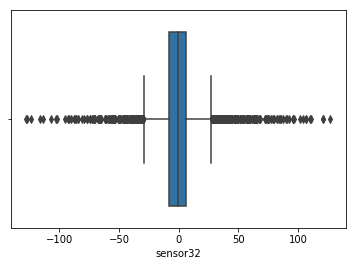

In [14]:
#boxplot
import seaborn as sns
sns.boxplot(x = df['sensor32'])

In [15]:
#Z score
def detect_outlier(data):
    outliers=[]
    
    threshold=3
    mean = np.mean(data)
    std  = np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std         #z = (x-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [16]:
outlier = detect_outlier(df.sensor1)
len(outlier)

246

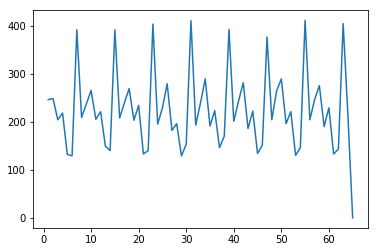

In [17]:
#Compute number of outliers for all columns
number_outliers = []
x = np.arange(1,66,1) 

for i in df.columns:
    outliers = detect_outlier(df[i])
    c = len(outliers)
    number_outliers.append(c)
plt.plot(x,number_outliers)
plt.show()

In [18]:
#ıqr (q3-q1) ---> aslında boxplot gibi oluyor.
def detect_outlier2(data):
    outliers = []
    
    data = sorted(data)
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    
    for i in data:
        if lower_bound <= i <= upper_bound:
            continue
        else:
            outliers.append(i)
    
    return outliers

In [19]:
outlier = detect_outlier2(df.sensor1)
len(outlier)

941

Outliers are more than z-score.

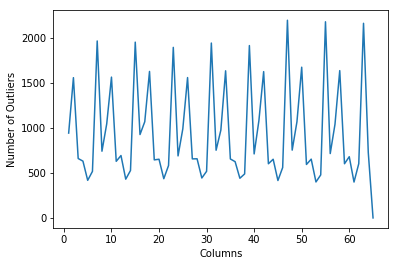

In [20]:
number_outliers2 = []
x = np.arange(1,66,1) 

for i in df.columns:
    outliers = detect_outlier2(df[i])
    c = len(outliers)
    number_outliers2.append(c)
plt.plot(x,number_outliers2)
plt.xlabel("Columns")
plt.ylabel("Number of Outliers")
plt.show()

In [21]:
#Z-score
from scipy import stats

z = np.abs(stats.zscore(df))
print(z)

[[1.42824598 0.40181081 1.14998428 ... 2.27819282 1.06933723 1.34504154]
 [2.50344161 0.4480798  0.85420537 ... 4.45133415 1.00494989 1.34504154]
 [0.99539705 0.61805793 1.45546226 ... 4.57009051 3.12973211 1.34504154]
 ...
 [0.02593984 0.19311262 0.05252951 ... 0.14057837 0.03913978 1.33944646]
 [0.08177763 0.40181081 0.94956531 ... 0.17610525 0.36107648 1.33944646]
 [0.07979858 0.40181081 0.54872738 ... 0.49278888 0.36107648 1.33944646]]


In [22]:
threshold = 3
print(np.where(z > threshold))

(array([    0,     0,     0, ..., 11658, 11673, 11673]), array([ 6,  7, 14, ..., 53, 45, 61]))


In [23]:
zdata = df[(z <= 3).all(axis=1)]
print(zdata.shape)

(6081, 65)


* Normalization

In [24]:
#next step is to standardize our data - using MinMaxScaler
y = df["class"]
x_data1 = df.drop(["class"],axis = 1)

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(x_data1)

x_data1 = pd.DataFrame(scaler.transform(x_data1), index=x_data1.index, columns=x_data1.columns)
x_data1.iloc[4:10]

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26,sensor27,sensor28,sensor29,sensor30,sensor31,sensor32,sensor33,sensor34,sensor35,sensor36,sensor37,sensor38,sensor39,sensor40,sensor41,sensor42,sensor43,sensor44,sensor45,sensor46,sensor47,sensor48,sensor49,sensor50,sensor51,sensor52,sensor53,sensor54,sensor55,sensor56,sensor57,sensor58,sensor59,sensor60,sensor61,sensor62,sensor63,sensor64
4,0.537445,0.536082,0.492537,0.561538,0.502347,0.530120,0.301961,0.523622,0.493671,0.547009,0.512821,0.668966,0.621622,0.439216,0.325490,0.474510,0.142276,0.444934,0.486111,0.650685,0.347150,0.380567,0.000000,0.278761,0.802632,0.495798,0.303030,0.597122,0.549550,0.549020,0.843137,0.721569,0.437229,0.532710,0.56,0.553191,0.535135,0.560784,0.450980,0.501961,0.443515,0.535398,0.403846,0.654135,0.460829,0.468,0.286275,0.407843,0.537500,0.541126,0.531532,0.543210,0.612440,0.549020,0.737255,0.685950,0.333333,0.515021,0.640000,0.640,0.422535,0.407843,0.062745,0.219124
5,0.577093,0.510309,0.417910,0.461538,0.624413,0.401606,0.352941,0.645669,0.502110,0.572650,0.435897,0.551724,0.583784,0.741176,0.831373,0.776471,0.577236,0.497797,0.555556,0.732877,0.554404,0.542510,0.223529,0.579646,0.271930,0.470588,0.333333,0.661871,0.450450,0.439216,0.113725,0.356863,0.510823,0.518692,0.56,0.617021,0.491892,0.439216,0.552941,0.474510,0.410042,0.513274,0.423077,0.714286,0.488479,0.464,0.584314,0.439216,0.729167,0.510823,0.423423,0.358025,0.622010,0.458824,0.588235,0.421488,0.497942,0.575107,0.693333,0.680,0.507042,0.619608,0.313725,0.593625
6,0.458150,0.510309,0.477612,0.607692,0.492958,0.421687,0.231373,0.440945,0.413502,0.534188,0.410256,0.537931,0.621622,0.509804,0.784314,0.588235,0.495935,0.458150,0.472222,0.602740,0.352332,0.425101,0.321569,0.455752,0.381579,0.491597,0.500000,0.741007,0.639640,0.619608,0.772549,0.560784,0.658009,0.532710,0.52,0.510638,0.437838,0.572549,0.490196,0.505882,0.468619,0.526549,0.394231,0.616541,0.451613,0.452,0.188235,0.419608,0.500000,0.541126,0.531532,0.580247,0.598086,0.490196,0.203922,0.533058,0.329218,0.506438,0.453333,0.464,0.427230,0.317647,0.525490,0.374502
7,0.700441,0.536082,0.462687,0.623077,0.619718,0.594378,0.701961,0.610236,0.426160,0.538462,0.448718,0.565517,0.643243,0.580392,0.192157,0.321569,0.524390,0.506608,0.597222,0.746575,0.487047,0.445344,0.615686,0.845133,0.403509,0.453782,0.348485,0.676259,0.427928,0.407843,0.050980,0.262745,0.329004,0.528037,0.60,0.652482,0.610811,0.517647,1.000000,0.682353,0.476987,0.482301,0.307692,0.541353,0.364055,0.436,0.219608,0.203922,0.737500,0.558442,0.549550,0.592593,0.641148,0.678431,1.000000,0.698347,0.539095,0.566524,0.746667,0.792,0.525822,0.552941,0.788235,0.681275
8,0.396476,0.489691,0.223881,0.115385,0.460094,0.349398,0.168627,0.346457,0.578059,0.589744,0.564103,0.689655,0.756757,0.823529,0.929412,0.784314,0.349593,0.471366,0.513889,0.732877,0.528497,0.502024,0.172549,0.460177,0.618421,0.470588,0.363636,0.633094,0.418919,0.431373,0.141176,0.494118,0.203463,0.532710,0.63,0.673759,0.540541,0.407843,0.000000,0.407843,0.748954,0.526549,0.375000,0.593985,0.511521,0.456,0.917647,0.576471,0.520833,0.502165,0.441441,0.450617,0.559809,0.498039,0.592157,0.458678,0.448560,0.545064,0.640000,0.672,0.455399,0.529412,0.494118,0.490040
9,0.361233,0.551546,0.626866,0.800000,0.596244,0.389558,0.015686,0.500000,0.514768,0.521368,0.205128,0.124138,0.497297,0.490196,0.815686,0.592157,0.467480,0.480176,0.513889,0.732877,0.585492,0.554656,0.564706,0.522124,0.390351,0.466387,0.348485,0.748201,0.554054,0.537255,0.643137,0.458824,0.567100,0.528037,0.56,0.539007,0.427027,0.517647,0.325490,0.482353,0.514644,0.522124,0.375000,0.706767,0.529954,0.536,0.639216,0.592157,0.350000,0.502165,0.504505,0.518519,0.435407,0.372549,0.529412,0.504132,0.646091,0.549356,0.480000,0.456,0.582160,0.513725,0.666667,0.537849


In [25]:
#other way for normalization
y = df["class"]
x_data2 = df.drop(["class"],axis = 1)

x = (x_data2 - np.min(x_data2)) / (np.max(x_data2) - np.min(x_data2)).values
x_data2 = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)
x_data2.iloc[4:10]


,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26,sensor27,sensor28,sensor29,sensor30,sensor31,sensor32,sensor33,sensor34,sensor35,sensor36,sensor37,sensor38,sensor39,sensor40,sensor41,sensor42,sensor43,sensor44,sensor45,sensor46,sensor47,sensor48,sensor49,sensor50,sensor51,sensor52,sensor53,sensor54,sensor55,sensor56,sensor57,sensor58,sensor59,sensor60,sensor61,sensor62,sensor63,sensor64
4,0.513381,0.538846,0.499889,0.581243,0.570434,0.492089,0.503145,0.505999,0.466218,0.549346,0.468113,0.583924,0.554711,0.503683,0.503237,0.503822,0.484318,0.482136,0.534529,0.682539,0.535477,0.487371,0.501961,0.523357,0.477205,0.485276,0.428834,0.687749,0.488962,0.504114,0.505267,0.504790,0.452109,0.525854,0.5656,0.606760,0.516406,0.504160,0.503729,0.503929,0.508132,0.533342,0.378883,0.598903,0.472170,0.493872,0.503083,0.503560,0.535573,0.521823,0.491275,0.534217,0.562739,0.504114,0.504852,0.531760,0.478738,0.551567,0.621867,0.597120,0.485552,0.503560,0.502207,0.494897
5,0.513555,0.538713,0.498775,0.580473,0.571007,0.491573,0.503345,0.506479,0.466254,0.549456,0.467127,0.583115,0.554507,0.504867,0.505221,0.505006,0.486086,0.482369,0.535494,0.683102,0.536551,0.488026,0.502837,0.524689,0.474877,0.485171,0.429293,0.688215,0.488516,0.503683,0.502407,0.503360,0.452428,0.525788,0.5656,0.607213,0.516172,0.503683,0.504129,0.503822,0.507992,0.533245,0.379068,0.599356,0.472297,0.493856,0.504252,0.503683,0.536372,0.521692,0.490301,0.533074,0.562785,0.503760,0.504268,0.530667,0.479415,0.551824,0.622578,0.597440,0.485949,0.504391,0.503191,0.496389
6,0.513031,0.538713,0.499666,0.581598,0.570389,0.491653,0.502868,0.505673,0.465880,0.549291,0.466798,0.583020,0.554711,0.503960,0.505037,0.504268,0.485756,0.482194,0.534336,0.682211,0.535504,0.487551,0.503222,0.524140,0.475358,0.485259,0.431818,0.688784,0.489368,0.504391,0.504990,0.504160,0.453065,0.525854,0.5652,0.606458,0.515880,0.504206,0.503883,0.503945,0.508237,0.533303,0.378791,0.598621,0.472127,0.493808,0.502699,0.503606,0.535417,0.521823,0.491275,0.534446,0.562670,0.503883,0.502760,0.531128,0.478721,0.551530,0.619378,0.595712,0.485574,0.503206,0.504022,0.495516
7,0.514099,0.538846,0.499443,0.581716,0.570985,0.492347,0.504714,0.506340,0.465933,0.549310,0.467291,0.583210,0.554828,0.504237,0.502714,0.503222,0.485872,0.482408,0.536073,0.683196,0.536202,0.487633,0.504375,0.525863,0.475454,0.485100,0.429522,0.688318,0.488414,0.503560,0.502161,0.502991,0.451641,0.525832,0.5660,0.607464,0.516815,0.503991,0.505882,0.504637,0.508272,0.533108,0.377959,0.598055,0.471724,0.493744,0.502822,0.502760,0.536406,0.521898,0.491437,0.534522,0.562876,0.504621,0.505882,0.531811,0.479585,0.551788,0.623289,0.598336,0.486037,0.504129,0.505052,0.496738
8,0.512760,0.538607,0.495879,0.577811,0.570235,0.491363,0.502622,0.505301,0.466574,0.549529,0.468771,0.584067,0.555442,0.505190,0.505606,0.505037,0.485161,0.482253,0.534915,0.683102,0.536417,0.487862,0.502637,0.524160,0.476397,0.485171,0.429752,0.688008,0.488374,0.503652,0.502514,0.503899,0.451097,0.525854,0.5663,0.607615,0.516435,0.503560,0.501961,0.503560,0.509410,0.533303,0.378606,0.598451,0.472403,0.493824,0.505559,0.504221,0.535503,0.521654,0.490463,0.533646,0.562487,0.503914,0.504283,0.530821,0.479212,0.551696,0.621867,0.597376,0.485706,0.504037,0.503899,0.495976
9,0.512605,0.538925,0.501894,0.583077,0.570874,0.491524,0.502022,0.505906,0.466307,0.549237,0.464168,0.580166,0.554039,0.503883,0.505160,0.504283,0.485640,0.482292,0.534915,0.683102,0.536712,0.488076,0.504175,0.524434,0.475396,0.485153,0.429522,0.688836,0.488982,0.504068,0.504483,0.503760,0.452671,0.525832,0.5656,0.606660,0.515822,0.503991,0.503237,0.503852,0.508429,0.533284,0.378606,0.599299,0.472488,0.494144,0.504468,0.504283,0.534792,0.521654,0.491032,0.534065,0.561892,0.503422,0.504037,0.531009,0.480025,0.551714,0.619733,0.595648,0.486301,0.5

No differences among two process.

**Logistic Regression**
* For Including Outliers

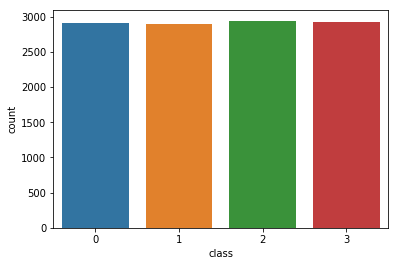

In [26]:
sns.countplot(x='class', data=df)

Only I choose 0 and 1 class. Because of logistic regression used for binary classes.

In [27]:
#0 and 1lerin indeksleri
count = 0
for i in y:
    if i == 0 or i == 1:
        count+=1
    else:
        break
print(count)

5812


In [28]:
y = y[0:5812].values.reshape(-1,1)
x = x_data1[0:5812].values

print(y.shape)
print(x.shape)

(5812, 1)
(5812, 64)


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42) 

In [30]:
a=0
b=0
c=0
d=0
for i in y_train:
    if i ==0:
        a+=1
    else:
        b+=1
for i in y_test:
    if i ==0:
        c+=1
    else:
        d+=1
    
print("0 class for train: ",a,"\n1 class for train: ",b,"\n0 class for test: ",c,"\n1 class for test: ",d)

0 class for train:  2006 
1 class for train:  2062 
0 class for test:  904 
1 class for test:  840


In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

print("Test Accuracy {}".format(log_reg.score(x_test,y_test)))

Test Accuracy 0.6055045871559633


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bu normalizasyonsuz deneme!

In [ ]:
x5 = df.drop(["class"],axis=1)
x5 = x5.values
y5 = df["class"].values.reshape(-1,1)

x5 = x5[0:5812]
y5 = y5[0:5812]

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x5,y5,test_size = 0.3, random_state = 42) 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train1,y_train1)

print("Test Accuracy: {}".format(lr.score(x_test1,y_test1)))

Outlierların cıkarılmış haline

In [ ]:
sns.countplot(x="class",data=zdata)

In [ ]:
y6 = zdata["class"].values.reshape(-1,1)
y6[2846]

In [ ]:
x6 = zdata.drop(["class"],axis=1)
x6 = x6.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x6,y6,test_size = 0.3, random_state = 42) 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression()
lr2.fit(x_train2,y_train2)

print("Accuracy: {}".format(lr2.score(x_test2,y_test2)))

**KNN Algorithms**

**Adımlar**
#KNN = K nearest neighbour(en yakın K komşu)
#1) K değerini seç
#2) K değeri kadar en yakın data noktalarını bul
#3) K en yakın komşu arasına hangi class tan kaç tane var hesapla
#4) Test ettiğimiz point ya da data hangi class a ait tahmin et

**Açıklama**
#Mesela yukarıdaki grafikte(radius- texture)  bir test noktası seciyoruz. Mesela x=20, y=30.
#Daha sonra K değerini sececeğiz. Bu şu demek. Diyelim K =3. Sectiğim test noktasına en yakın 3 tane nokta bul ve onları sec.
#3(K) tane komsu arasında hangi classtan kac tane var => kotu=3 , iyi=0
#Kotu class ıma daha yakın oldugu için bu test noktama kötü diyorum.

**Önemli**
#KNN ile en önemli şey normalization yapmaktır. Aksi taktirde featurelar birbirini domine edebilir. Bunu kesin yapmalıyız yoksa data mızın accuracy cok düşük cıkabilir.
#K değerini çift verdik ve esit sayıda iyi ve kötü cıktı bu durumda algoritma sınıflandırma yapamaz, k değerini bir artırır ve ya azaltır.
#KNN algoritması kendisi zaten en yüksek score için K değerini kendi içinde kendisi belirler.
#Hoca cevap:  K değerini deneyerek seçiyoruz. ve Ama gerçek hayatta sadece en iyi score değeri bizim k değerini seçmemiz için yeterli olmuyor. Bu nedenle gerçekten deneyerek buluyoruz :)


**Notlar**
#1) Data scientists usually choose as an odd number if the number of classes is 2 and another simple approach to select k is set k=sqrt(n).
#2)K value should be odd
#3)K value must not be multiples of the number of classes
#4)Should not be too small or too large

In [32]:
y = df["class"].values.reshape(-1,1)
x = df.drop(["class"],axis = 1).values

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42) 

In [35]:
#for K=3;
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  #n_neighbor = k
knn.fit(x_train,y_train)

#Accuracy for K=7
print("K={} iken accuracy: {}".format(3,knn.score(x_test,y_test)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


K=3 iken accuracy: 0.6799885812161005


In [36]:
#for K=7;
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

#Accuracy for K=7
print("K={} iken accuracy: {}".format(3,knn.score(x_test,y_test)))

#Alttaki hatayı almamak için np.ravel(y_train,order="C") yapıyoruz nedenine bak! Alttaki kodda var.
#Another way : model = knn.fit(train_fold, train_y.values.reshape(-1,))
#Açıklaması net bir şekilde burda: https://www.w3resource.com/numpy/manipulation/ravel.php

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


K=3 iken accuracy: 0.6845560947759064


1 0.6640022837567799
2 0.659434770196974
3 0.6799885812161005
4 0.6839851555809306
5 0.6825578075934913
6 0.678846702826149
7 0.6845560947759064
8 0.6797031116186126
9 0.6799885812161005
10 0.6774193548387096
11 0.676848415643734
12 0.6794176420211248
13 0.6771338852412218
14 0.6762774764487582
15 0.6708535540964887
16 0.6705680844990008
17 0.6714244932914645
18 0.6694262061090493
19 0.6671424493291465
20 0.6697116757065372
21 0.6685697973165858


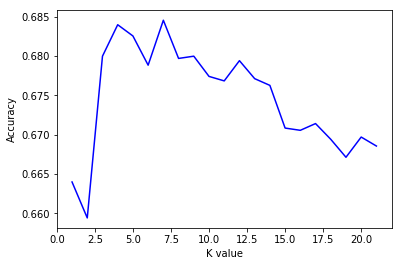

In [38]:
#Find the best K value
k_value = []
accuracy = []

for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,np.ravel(y_train,order='C'))
    
    score = knn.score(x_test,y_test)
    k_value.append(i)
    accuracy.append(score)
for i,j in zip(k_value,accuracy):
    print(i,j)

#Find K value for Max accuracy
plt.plot(range(1,22),accuracy,color = "blue")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

In [41]:
"""
#Find max accuracy with range 1-200 for K
max_accuracy = 0

for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,np.ravel(y_train,order="C"))
    score = knn.score(x_test,y_test)
    
    if score > max_accuracy:
        k,max_accuracy = i,score
    else:
        continue
print(k,":",max_accuracy)"""

7 : 0.6845560947759064


#Bu işlem cok uzun sürdü bunun için range i küçült ve tek sayılar yap!!!!

**Sonuç**
#Random_state(yani randomlugu) değiştirince de accuracy değişiyor. Mesela 1 yapınca %95 oluyor.
#K değeri değişince de accuracy değişiyor.
#test_size değişince de accuracy değişiyor.

In [46]:
#random_state verme bakalım kendisi sürekli değişsin sonuç ne kadar değişiyor!
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42) 

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,np.ravel(y_train,order="C"))

print("K=7  Accuracy: {}".format(knn.score(x_test,y_test)))

K=7  Accuracy: 0.6946466809421842


Test size düşün 0.2 olunca accuracy 0.6844 ten 0.6877 oldu.
ve Randomstate değerini 42 verince yüzde 69.46 ya çıktı.